In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("D:\\Data Science Batch 74\\Batch 74 Day 26\\CS 37 Ans -Unsupervised Learning-1\\driver-data.csv")
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [3]:
newdf=df.iloc[:,[1,2]]
newdf


,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [4]:
#checking null values
newdf.isnull().sum()

mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [5]:
#before clustering

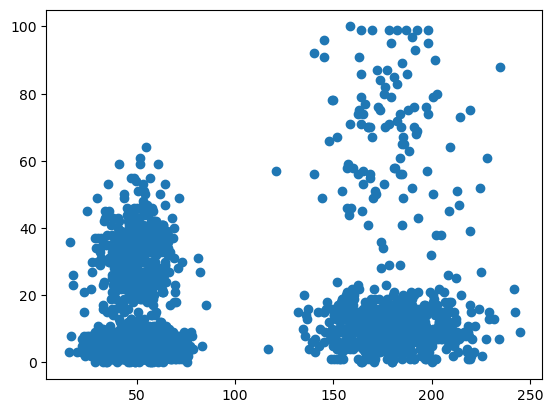

In [6]:
plt.scatter(df['mean_dist_day'],df["mean_over_speed_perc"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_dist_day', ylabel='mean_over_speed_perc'>

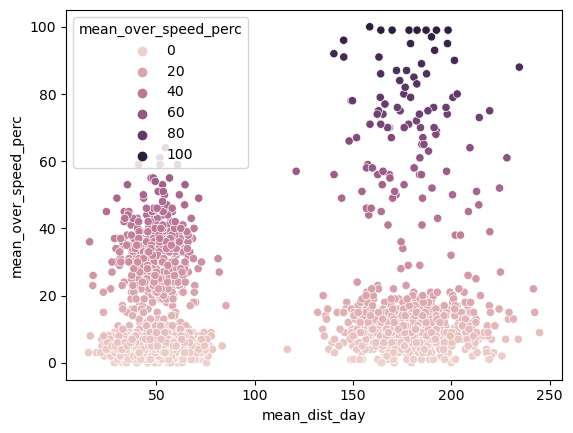

In [7]:
sns.scatterplot(df['mean_dist_day'],df["mean_over_speed_perc"],hue=df["mean_over_speed_perc"],)

In [8]:
y=newdf.groupby('mean_dist_day').size()
y

mean_dist_day
15.52     1
16.05     1
16.39     1
17.66     1
17.81     1
         ..
234.09    1
234.52    1
241.71    1
242.37    1
244.79    1
Length: 2920, dtype: int64

In [9]:
x=newdf.groupby('mean_over_speed_perc').size()
x

mean_over_speed_perc
0       23
1      120
2      177
3      353
4      503
      ... 
95       2
96       1
97       1
99       7
100      1
Length: 96, dtype: int64

In [10]:
newdf.describe()

,mean_dist_day,mean_over_speed_perc
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(newdf)
    wcss.append(kmeans.inertia_)
wcss   

[12184626.129627978,
 1316420.850947719,
 992644.3397341783,
 719601.1096991901,
 534637.7793413935,
 372832.2971324591,
 319827.4842776174,
 276961.4824710088,
 252717.7236772509,
 230207.54418327357]

In [12]:
'''
K-Means: Inertia
Inertia measures how well a dataset was clustered by K-Means. 
It is calculated by measuring the distance between each data point and 
its centroid, squaring this distance, and summing these squares across one cluster.
A good model is one with low inertia AND a low number of clusters ( K ).
'''

'\nK-Means: Inertia\nInertia measures how well a dataset was clustered by K-Means. \nIt is calculated by measuring the distance between each data point and \nits centroid, squaring this distance, and summing these squares across one cluster.\nA good model is one with low inertia AND a low number of clusters ( K ).\n'

Text(0.5, 1.0, 'Elbow method')

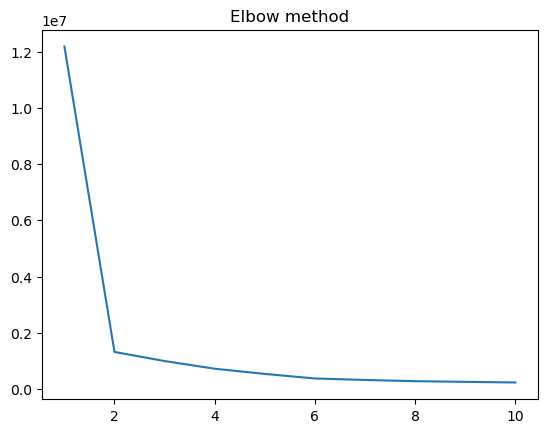

In [13]:
plt.plot(range(1,11),wcss)
plt.title('Elbow method')


In [14]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(newdf)

KMeans(n_clusters=2)

In [15]:
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [16]:
#Since kmeans cluster=2, cluster centres give two nearest centre point of two columns

In [17]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
len(kmeans.labels_)

4000

In [19]:
newdf['Clusters']=kmeans.labels_

In [20]:
newdf

,mean_dist_day,mean_over_speed_perc,Clusters
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0
...,...,...,...
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1


In [21]:
newdf.groupby('Clusters').count()

,mean_dist_day,mean_over_speed_perc
Clusters,,
0,3200,3200
1,800,800


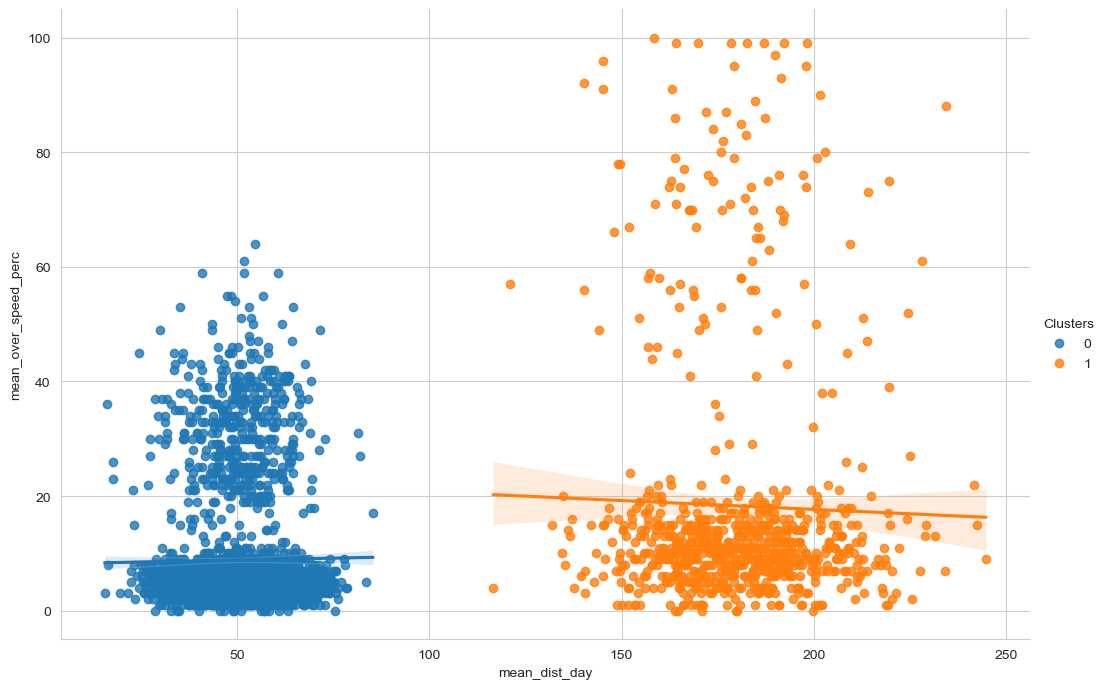

In [27]:
#Plotting through lmplot
sns.set_style("whitegrid")
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=newdf,hue="Clusters", height=7,
    aspect=1.5)
sns.lmplot()

In [31]:
chumma=newdf.copy()
chumma=chumma.iloc[:,[0,1]]
chumma

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [32]:
new_kmeans=KMeans(n_clusters=3)
new_kmeans.fit(chumma)

KMeans(n_clusters=3)

In [37]:
new_kmeans.cluster_centers_

array([[180.34311782,  10.52011494],
       [ 50.04763438,   8.82875   ],
       [177.83509615,  70.28846154]])

In [42]:
new_kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [43]:
chumma['cluster']=new_kmeans.labels_

In [44]:
chumma.groupby('cluster').count()

,mean_dist_day,mean_over_speed_perc
cluster,,
0,696,696
1,3200,3200
2,104,104


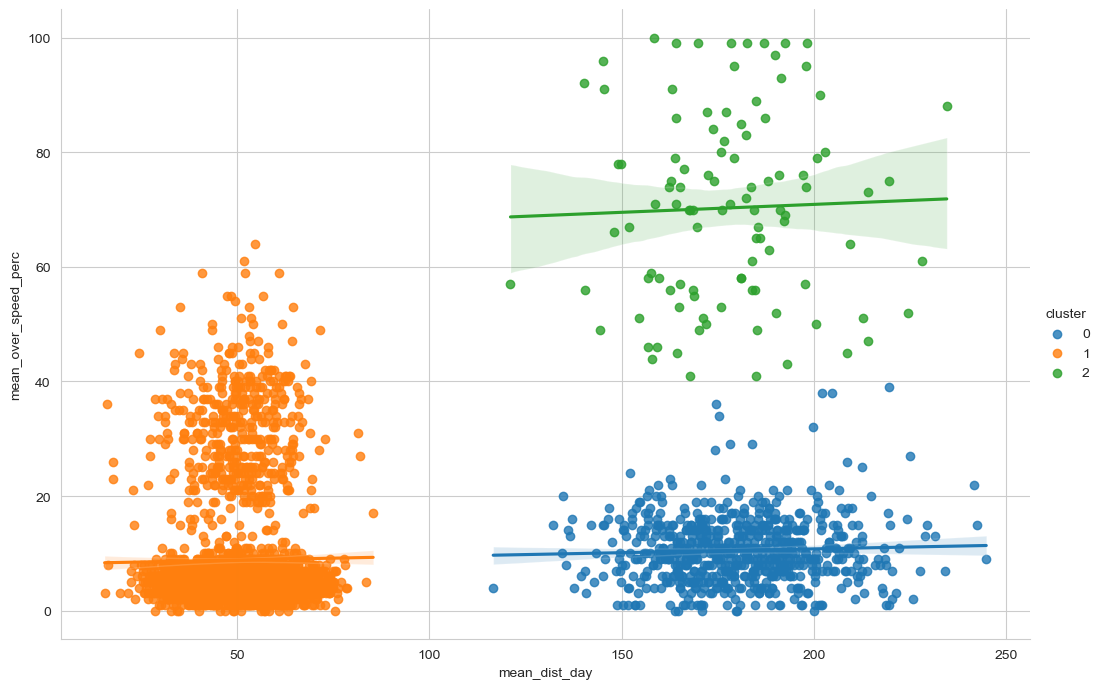

In [45]:
sns.set_style("whitegrid")
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=chumma,hue="cluster", height=7,
    aspect=1.5)